# Importing Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [32]:
data=pd.read_csv("Position_Salaries.csv")

Checking for null values

In [33]:
print(data.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [34]:
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [35]:
print(data.size)

30


Dividing dataset into dependent and independent data

In [36]:
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values

We don't need to do the spliting here because we have vary less data which is 10 rows only.


# Feature Scaling...

In [37]:
from sklearn.preprocessing import StandardScaler
x_sc=StandardScaler()
y_sc=StandardScaler()

x_data=x_sc.fit_transform(X)
y_data=y_sc.fit_transform(Y.reshape(-1,1))

# Preparing Random Forest Regression model...

In [38]:
from sklearn.ensemble import RandomForestRegressor
dtr=RandomForestRegressor(n_estimators=10,random_state=0)
dtr.fit(x_data,y_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the test data by using Regression model

In [39]:
y_pred=dtr.predict(y_data)
y_predict=y_sc.inverse_transform(y_pred.reshape(-1,1))

Comparing the original and predicted data.....

In [40]:
print(np.concatenate((Y.reshape(-1,1),y_predict.reshape(-1,1)),axis=1))

[[  45000.   68000.]
 [  50000.   68000.]
 [  60000.   74000.]
 [  80000.   74000.]
 [ 110000.   89000.]
 [ 150000.   89000.]
 [ 200000.  101000.]
 [ 300000.  167000.]
 [ 500000.  390000.]
 [1000000.  850000.]]


Predicting random_data....

In [41]:
print(y_sc.inverse_transform(dtr.predict(x_sc.transform([[8.5]])).reshape(-1,1)))

[[390000.]]


## Visualising the Random Forest regression results

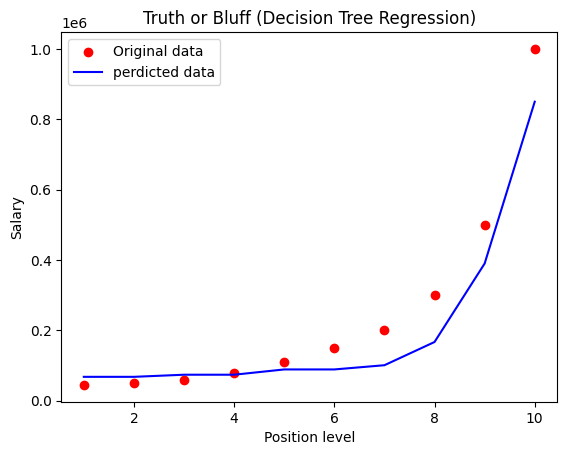

In [42]:
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(X,y_predict,color="blue",label="perdicted data")
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the Random Forest regression results (for higher resolution and smoother curve)

<ipython-input-43-bdd63ad159cf>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(X),max(X),0.1)


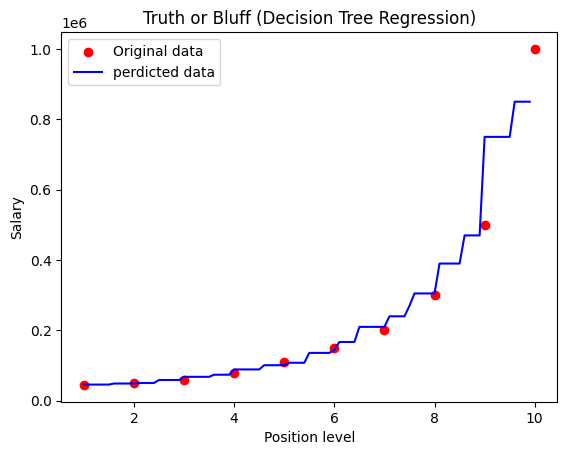

In [43]:
x_grid=np.arange(min(X),max(X),0.1)
x_grid=x_grid.reshape(-1,1)
plt.scatter(X,Y,color="red",label="Original data")
plt.plot(x_grid,y_sc.inverse_transform(dtr.predict(x_sc.transform(x_grid)).reshape(-1,1)),color="blue",label="perdicted data")
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import r2_score
print("Model Accuracy : ",r2_score(Y,y_predict))

Model Accuracy :  0.9165198094523771
